### Reommender - Matrix Factorization

The goal of this project is to recommend movie to a certain user. I am going to use Matrix Factorization to train a user matrix and a movie matrix. 

##### Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from collections import Counter

In [255]:
ratingDf = pd.read_csv('rating.csv')

In [256]:
ratingDf.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [257]:
print('number of rows: ', ratingDf.shape[0])

number of rows:  20000263


In [258]:
print('Total number of movies being rate: ' , ratingDf.movieId.nunique())
print('Total number of clients who rated: ', ratingDf.userId.nunique())

Total number of movies being rate:  26744
Total number of clients who rated:  138493


##### data set too large, subsample

In [291]:
#number of users and items we are going to keep
n = 4000
m = 800

In [292]:
# only keep the top users and top items
user_ids_count = Counter(ratingDf.userId)
item_ids_count = Counter(ratingDf.movieId)

user_ids = [u for u, c in user_ids_count.most_common(n)]
item_ids = [m for m, c in item_ids_count.most_common(m)]

In [293]:
rating_sub = ratingDf[(ratingDf.userId.isin(user_ids)) & (ratingDf.movieId.isin(item_ids))]

In [294]:
print('After Sub-sample:')
print('number of rows: ', rating_sub.shape[0])

After Sub-sample:
number of rows:  1715725


##### Reindex

In [295]:
new_user_id_map = {}
i = 0
for old in user_ids:
    new_user_id_map[old] = i
    i += 1
print('i: ', i)
    

i:  4000


In [296]:
new_movie_id_map = {}
j = 0
for old in item_ids:
    new_movie_id_map[old] = j
    j += 1
print('j:',j)

j: 800


In [297]:
rating_sub.loc[:,'userId'] = rating_sub.apply(lambda row: new_user_id_map[row.userId], axis= 1)
rating_sub.loc[:,'movieId'] = rating_sub.apply(lambda row: new_movie_id_map[row.movieId], axis = 1)

/Users/yucongweng/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [298]:
print('max user id: ', rating_sub.userId.max())
print('max movie id: ', rating_sub.movieId.max())

max user id:  3999
max movie id:  799


##### split in train and test data set

In [299]:
rating_sub = shuffle(rating_sub)

In [300]:
cutoff = 0.8
df_train = rating_sub.iloc[:int(cutoff * len(rating_sub))]
df_test = rating_sub.iloc[int(cutoff * len(rating_sub)):]



#### Convert data frame to dicitonary

In [301]:
user2movie = {}
movie2user = {}
usermovie2rating = {}


In [302]:
def df_to_dict(row):
    user_id = row.userId
    movie_id = row.movieId
    r = row.rating
    
    if user_id not in user2movie:
        user2movie[user_id] = [movie_id]
    else:
        user2movie[user_id].append(movie_id)
        
    if movie_id not in movie2user:
        movie2user[movie_id] = [user_id]
    else:
        movie2user[movie_id].append(user_id)
        
    usermovie2rating[(user_id, movie_id)] = r

In [303]:
df_train.apply(df_to_dict, axis = 1)

11415672    None
14829098    None
4093886     None
17179546    None
7021747     None
4987918     None
12613704    None
10209782    None
10169308    None
18864721    None
11746       None
15996290    None
7432046     None
2251515     None
4938493     None
7542907     None
16492015    None
8452036     None
15434602    None
18396413    None
13482475    None
9875941     None
6500167     None
10942335    None
1541778     None
13566768    None
1347956     None
12243633    None
19022219    None
5071270     None
            ... 
8961641     None
4297753     None
13674958    None
12088997    None
8045551     None
1355170     None
5050993     None
3376894     None
6763545     None
11521391    None
14958362    None
16439433    None
12867593    None
9775475     None
7461516     None
6152541     None
9614593     None
16922470    None
3935387     None
7021456     None
10264288    None
6455046     None
4845707     None
15652950    None
5931436     None
7329779     None
9467631     None
8771297     No

In [304]:
user2movierating = {}
for i, movies in user2movie.items():
    r = np.array([usermovie2rating[(i, j)] for j in movies])
    user2movierating[i] = (movies, r)

In [305]:
movie2userating = {}
for j, users in movie2user.items():
    r = np.array([usermovie2rating[(i,j)] for i in users])
    movie2userating[j] = (users, r)

In [306]:
usermovie2rating_test = {}

def df_to_dict_test(row):
    user_id = row.userId
    movie_id = row.movieId
    r = row.rating
    
    usermovie2rating_test[(user_id, movie_id)] = r
    
df_test.apply(df_to_dict_test, axis = 1)

6425250     None
4957486     None
9179915     None
12276556    None
15186650    None
12294597    None
19069318    None
19568474    None
1914339     None
6889738     None
10100153    None
13388651    None
4998229     None
7108110     None
867199      None
13290291    None
3137531     None
14979909    None
12074228    None
9525248     None
14647920    None
2993887     None
11535774    None
19474785    None
14392530    None
14475124    None
837577      None
2741318     None
15039817    None
6554376     None
            ... 
13246745    None
13198844    None
10470948    None
1153779     None
9574353     None
16063626    None
13970647    None
8790391     None
7428424     None
9475472     None
6962723     None
12900883    None
5616314     None
15518957    None
12462797    None
15590684    None
3765934     None
17178930    None
8759827     None
11409137    None
8759713     None
6049279     None
16713877    None
78511       None
4451645     None
17184489    None
16208090    None
17122855    No

In [307]:
movie2userating_test = {}
for (i, j), r in usermovie2rating_test.items():
    if j not in movie2userating_test:
        movie2userating_test[j] = [[i], [r]]
    else:
        movie2userating_test[j][0].append(i)
        movie2userating_test[j][1].append(r)
for j, (i, r) in movie2userating_test.items():
    movie2userating_test[j][1] = np.array(r)

In [309]:
N = np.max(list(user2movie.keys())) + 1

In [310]:
m1 = np.max(list(movie2user.keys()))
m2 = np.max([m for (u, m), r in usermovie2rating_test.items()])
M = max(m1, m2) + 1
print('N: ', N, 'M: ', M)

N:  4000 M:  800


### Matrix Factorization

##### Loss Function

In [311]:
def get_cost(movie2userating):
    # intput - movie2userating: movie_id ->(user_id, rating)
    M = float(len(movie2userating))
    sse = 0
    N = 0
    for j, (user, r) in movie2userating.items():
        p = W[user].dot(U[j]) + b[user] + c[j] + mu
        sse += (p - r) .dot(p - r)
        N += len(user)
    return sse / N

In [329]:
K = 10 # set K to be 10 first

# initialize parameters
W = np.random.randn(N, K)
b = np.random.randn(N)
U = np.random.randn(M, K)
c = np.random.randn(M)
mu = np.mean(list(usermovie2rating.values()))

In [330]:
cTrain = []
cTest = []
T = 25
reg = 20.

In [331]:

for t in range(T):
    print('epoch: ', t)

    for i in range(N):
        ##¥print('i: ', i)
        movie_i, rating = user2movierating[i]
        # update W
        An = np.eye(K) + U[movie_i].T.dot(U[movie_i])
        bn = (rating - b[i] - c[movie_i] - mu).dot(U[movie_i])
        W[i] = np.linalg.solve(An, bn)
        # update b
        bi = (rating - U[movie_i].dot(W[i]) - c[movie_i] - mu).sum()
        b[i] = bi / (len(movie_i)+ reg)
        
        
    for k in range(M):
        user_k, rating = movie2userating[k]
        # update U
        An = np.eye(K) * reg + W[user_k].T.dot(W[user_k])
        bn = (rating - b[user_k]- c[k] - mu).dot(W[user_k])
        U[k] = np.linalg.solve(An, bn)
        # udpate c
        cj = (rating - W[user_k].dot(U[k]) - b[user_k] - mu).sum()
        c[k] = cj / (len(user_k) + reg)
       
    cTrain.append(get_cost(movie2userating))
    cTest.append(get_cost(movie2userating_test))
        
        
    
    

epoch:  0
epoch:  1
epoch:  2
epoch:  3
epoch:  4
epoch:  5
epoch:  6
epoch:  7
epoch:  8
epoch:  9
epoch:  10
epoch:  11
epoch:  12
epoch:  13
epoch:  14
epoch:  15
epoch:  16
epoch:  17
epoch:  18
epoch:  19
epoch:  20
epoch:  21
epoch:  22
epoch:  23
epoch:  24


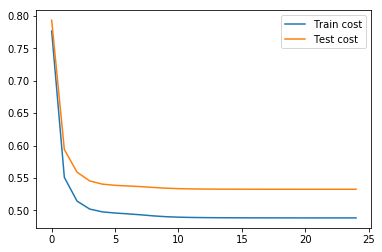

In [332]:
plt.plot(cTrain, label = 'Train cost')
plt.plot(cTest, label = 'Test cost')
plt.legend()
plt.show()

##### Prediction

In [333]:
i = 3507
j = 576
print('user id: ', i, 'movie id: ', j)
print('True Value:', usermovie2rating_test[i,j])

print('predicted value: ', W[i].dot(U[j]) + b[i] + c[j] + mu)

user id:  3507 movie id:  576
True Value: 1.5
predicted value:  2.10245067367


In [334]:
i = 0
print('want to recommend 5 movies to user',i, ': ')
predict_df = pd.DataFrame(W[i].dot(U.T) + b[i] + c + mu)
predict_df.columns = ['predicted_rating']
print('top 5 movies are')
print(predict_df.loc[~predict_df.index.isin(user2movie[0])].sort_values(by = 'predicted_rating',ascending=False ).head())

want to recommend 5 movies to user 0 : 
top 5 movies are
     predicted_rating
28           4.716793
2            4.560873
231          4.426501
30           4.358351
83           4.303412


##### Analyzing Result 

In [335]:
W_df= pd.DataFrame(W)

In [336]:
U_df = pd.DataFrame(U)

In [337]:
print('After Training, we have two matrix')
print('User matrix - probability of User i like Cluster k')
print(W_df.head())
print('')
print('Movie matrix - probabiity of movie j belong to Cluster k ')
print( U_df.head())

After Training, we have two matrix
User matrix - probability of User i like Cluster k
          0         1         2         3         4         5         6  \
0 -0.219268 -0.210966  0.124704 -0.002262  0.025407 -0.024793 -0.019829   
1  0.798591 -0.748430  0.294879  1.066628 -0.035754  0.157758 -0.640767   
2 -0.414467 -0.614185 -0.982505  0.889677 -0.231657  0.000612 -0.463856   
3  0.225319 -0.422685  0.256227  0.025528  0.249863 -0.034429 -0.016908   
4  0.201385 -0.344594  0.435967 -0.019500  0.088593  0.371290  0.124228   

          7         8         9  
0  0.076031  0.316506 -0.333051  
1  0.220301  0.567845 -0.272728  
2 -1.182212  0.424274 -0.572056  
3  0.108309  0.259305 -1.100367  
4 -0.039106  0.089770 -0.283350  

Movie matrix - probabiity of movie j belong to Cluster k 
          0         1         2         3         4         5         6  \
0  0.198043 -0.045904 -0.075102  0.558119  0.155466  0.640815  0.290088   
1 -0.597980 -0.806697 -0.231650 -0.187091  0.29786

In [338]:
print('top 5 movies in the 2nd cluster')
print(U_df.sort_values(by = 2, ascending=False).loc[:,2].head())

top 5 movies in the 2nd cluster
637    0.638422
409    0.618389
305    0.586658
230    0.577503
311    0.568302
Name: 2, dtype: float64
